# Imports

In [1]:
import os
import sys
import pandas as pd

# AI content (GitHub Copilot, 02/07/2024), verified and adapted by Nicolas Huber.
src_directory: str = os.path.join(os.getcwd(), "..")
sys.path.append(src_directory)

from helpers import data_analyzer as data_analyzer
from algorithms import angle_analyzer as angle_analyzer
from helpers import data_visualizer as data_visualizer
import constants as constants

# Variables

In [2]:
CSV_FILE = "/Users/nicolas/Downloads/test_angle_analyzer.csv"

# Initialisation

In [3]:
DataAnalyzer: data_analyzer.DataAnalyzer = data_analyzer.DataAnalyzer(CSV_FILE)
Visualizer: data_visualizer.DataVisualizer = data_visualizer.DataVisualizer()

# Data Import

In [4]:
data: pd.DataFrame = DataAnalyzer.read_csv_data()

# Data Processing

In [5]:
AngleAnalyzer: angle_analyzer.AngleAnalyzer = DataAnalyzer.construct_angle_analyzer()
data_processed: pd.DataFrame = DataAnalyzer.process_data(data, AngleAnalyzer)

# Visualisation

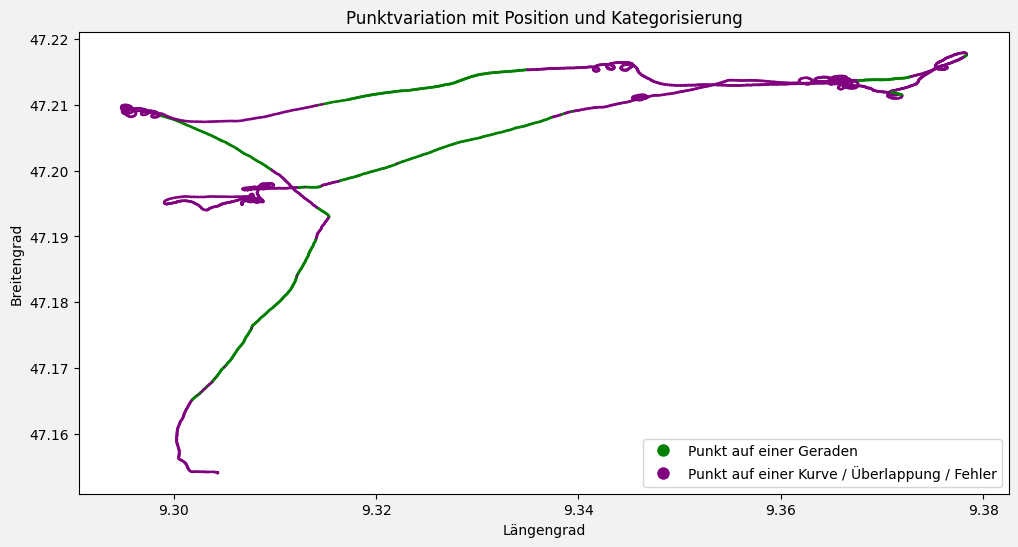

In [6]:
Visualizer.visualize_points_position(data_processed)

# Export Data

In [7]:
DataAnalyzer.export_to_csv(data_processed)

Data exported to /Users/nicolas/Downloads/test_angle_analyzer_analyzed.csv


# Report

In [8]:
print(f"You lost {len(data)-len(data_processed)} rows of data due to processing. The data loss is supposed to be {constants.ANGLE_FUTURE_THRESHOLD + constants.ANGLE_PAST_THRESHOLD} rows, which can be calculated by adding the ANGLE_FUTURE_THRESHOLD and the ANGLE_PAST_TRESHOLD.")
print()
print(f"The average accuracy of the AngleAnalyzer algorithm and the past / future tresholds of {constants.ANGLE_PAST_THRESHOLD} / {constants.ANGLE_FUTURE_THRESHOLD} for points on a straight line can be defined as follows:")
print(f"--> average r_value: {round(data_processed[data_processed['position_int'] == 0]['average_r_value'].mean(), 2)}")
print(f"--> average p_value: {round(data_processed[data_processed['position_int'] == 0]['average_p_value'].mean(), 2)}")
print(f"--> average std_err: {round(data_processed[data_processed['position_int'] == 0]['average_std_err'].mean(), 2)}")
print()
print("A linear regression can be considered as a good fit if the r_value is close to 1, the p_value is close to 0 and the std_err is close to 0 (GitHub Copilot, 02/08/2024).")
print()
print(f"The system found {(data_processed['position_int'] == 0).sum()} points on straight lines, whereas the amount of points on a curve is {(data_processed['position_int'] == 1).sum()}. The expected amount of points on a curve is {len(data_processed) - (data_processed['position_int'] == 0).sum()}, which can be calculated by subtracting the count of points on a straight line from the total point count.")
print()
print(f"In total, you lost {round((data_processed['position_int'] == 1).sum() / len(data_processed) * 100, 2)}% of the data after applying the AngleAnalyzer algorithm as you can only use the points on a straight line for further processing.")

You lost 135 rows of data due to processing. The data loss is supposed to be 135 rows, which can be calculated by adding the ANGLE_FUTURE_THRESHOLD and the ANGLE_PAST_TRESHOLD.

The average accuracy of the AngleAnalyzer algorithm and the past / future tresholds of 90 / 45 for points on a straight line can be defined as follows:
--> average r_value: 0.71
--> average p_value: 0.0
--> average std_err: 0.01

A linear regression can be considered as a good fit if the r_value is close to 1, the p_value is close to 0 and the std_err is close to 0 (GitHub Copilot, 02/08/2024).

The system found 937 points on straight lines, whereas the amount of points on a curve is 2887. The expected amount of points on a curve is 2887, which can be calculated by subtracting the count of points on a straight line from the total point count.

In total, you lost 75.5% of the data after applying the AngleAnalyzer algorithm as you can only use the points on a straight line for further processing.


# System Info

In [9]:
print(f"@ Version {constants.VERSION}")
print(f"@ Author {constants.AUTHOR}")
print(f"@ Author Email {constants.AUTHOR_EMAIL}")
print(f"@ Author URL {constants.AUTHOR_URL}")
print(f"@ GitHub URL {constants.GITHUB_URL}")

@ Version 0.1.0
@ Author Nicolas Huber
@ Author Email info@nicolas-huber.ch
@ Author URL https://nicolas-huber.ch
@ GitHub URL https://github.com/nicolashuberIT/flight-analyzer
